 J/ApJS/221/12/table1 

In [1]:
import numpy as np
import time
import matplotlib as mp
import matplotlib.pyplot as plt
import pandas as pd
import healpy as hp
%matplotlib inline

In [2]:
from astroquery.vizier import Vizier

In [3]:
import astropy.units as u
from astropy.coordinates.sky_coordinate import SkyCoord
from astropy.units import Quantity

In [4]:
%run ../../NoteBooks/alex/tools/hp4gaia.py

In [5]:
mp.rcParams['figure.figsize'] = (12, 8)

In [6]:
HE0435 =  SkyCoord.from_name("HE 0435-1223")

In [7]:
tables = Vizier.query_object("HE 0435-1223")

In [8]:
Vizier.ROW_LIMIT = 3000000

In [9]:
%time c = Vizier.get_catalogs(['J/ApJS/221/12/table1'])

CPU times: user 1min, sys: 1.06 s, total: 1min 1s
Wall time: 1min 1s


In [10]:
r=c.values()[0]

In [11]:
len(r)

1354775

In [12]:
r[:10]

WISEA,RAJ2000,DEJ2000,W1-W2,W2-W3,W1mag,gmag,z,f_z,LQAC2,DR12Q,HMQ,Sloan
,deg,deg,mag,mag,mag,mag,,,,,,
bytes19,float64,float64,float32,float32,float32,float32,float64,bytes1,bytes11,bytes18,bytes25,bytes5
J010112.73-021013.4,15.3030541,-2.1704141,1.71,4.37,14.90,--,--,,,,,Sloan
J010019.55-021347.9,15.0814943,-2.2299990,1.02,2.66,14.76,--,0.70000,p,,,BOSS J010019.56-021347.9,Sloan
J005949.31-015747.2,14.9554774,-1.9631265,0.97,3.30,13.14,--,--,,,,,Sloan
J010303.45-015647.1,15.7644001,-1.9464191,1.18,3.25,15.75,--,2.00000,p,,,BOSS J010303.47-015647.0,Sloan
J005847.73-021434.4,14.6988803,-2.2429080,1.24,4.07,16.32,--,--,,,,,Sloan
J005734.44-011732.8,14.3935405,-1.2924635,1.19,3.46,15.91,--,--,,,,J005734.4-011733,Sloan
J010316.71-012804.9,15.8196251,-1.4680342,1.55,4.56,17.24,--,--,,,,,Sloan
J010205.60-015038.1,15.5233336,-1.8439318,1.53,3.39,14.25,--,1.32000,s,015-001_005,,LBQS 0059-0206,Sloan


In [13]:
d = r.to_pandas()

In [14]:
d[:10]

,WISEA,RAJ2000,DEJ2000,W1-W2,W2-W3,W1mag,gmag,z,f_z,LQAC2,DR12Q,HMQ,Sloan
0,b'J010112.73-021013.4',15.303054,-2.170414,1.71,4.37,14.90,NaN,NaN,b'',b'',b'',b'',b'Sloan'
1,b'J010019.55-021347.9',15.081494,-2.229999,1.02,2.66,14.76,NaN,0.70,b'p',b'',b'',b'BOSS J010019.56-021347.9',b'Sloan'
2,b'J005949.31-015747.2',14.955477,-1.963126,0.97,3.30,13.14,NaN,NaN,b'',b'',b'',b'',b'Sloan'
3,b'J010303.45-015647.1',15.764400,-1.946419,1.18,3.25,15.75,NaN,2.00,b'p',b'',b'',b'BOSS J010303.47-015647.0',b'Sloan'
4,b'J005847.73-021434.4',14.698880,-2.242908,1.24,4.07,16.32,NaN,NaN,b'',b'',b'',b'',b'Sloan'
5,b'J005734.44-011732.8',14.393541,-1.292463,1.19,3.46,15.91,NaN,NaN,b'',b'',b'',b'J005734.4-011733',b'Sloan'
6,b'J010316.71-012804.9',15.819625,-1.468034,1.55,4.56,17.24,NaN,NaN,b'',b'',b'',b'',b'Sloan'
7,b'J010205.60-015038.1',15.523334,-1.843932,1.53,3.39,14.25,NaN,1.32,b's',b'015-001_005',b'',b'LBQS 0059-0206',b'Sloan'
8,b'J010259.70-015523.8',15.748751,-1.923300,0.94,3.01,15.02,NaN,NaN,b'',b'',b'',b'',b'Sloan'
9,b'J010142.23-015150.2',15.425989,-1.863970,0.95,3.28,15.36,NaN,2.29,b's',b'015-001_003',b'',b'LBQS 0059-0207',b'Sloan'


In [15]:
d['alpha'] = d['RAJ2000']*u.deg.to(u.rad)-np.pi
d['delta'] = d['DEJ2000']*u.deg.to(u.rad)

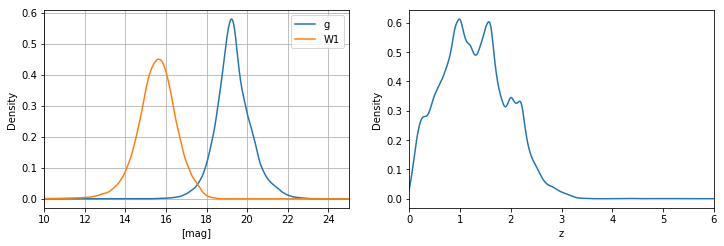

In [16]:
s = d.sample(frac=0.1)
plt.subplot(221)
d.gmag.plot.kde(label="g")
s.W1mag.plot.kde(label="W1")
plt.legend()
plt.xlim(10,25)
plt.grid()
plt.xlabel("[mag]")

plt.subplot(222)
d.z.plot.kde()
plt.xlim(0,6)
plt.xlabel('z')

QSO selection in ALL wise catalogue

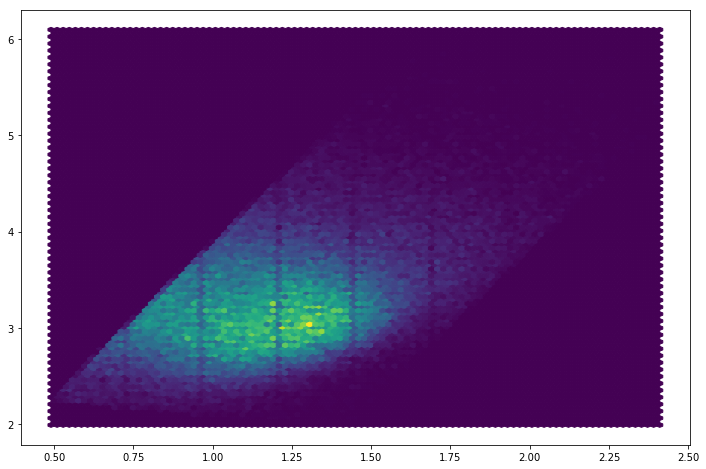

In [17]:
plt.hexbin(s['W1-W2'],s['W2-W3'])

In [18]:
d.groupby(np.floor(d.gmag)).WISEA.count()

gmag
14.0        2
15.0       71
16.0      613
17.0     4753
18.0    28363
19.0    45678
20.0    15710
21.0     3511
22.0      484
23.0       29
24.0        7
25.0        6
Name: WISEA, dtype: int64

In [19]:
d[np.isnan(d.gmag)].count()

WISEA      1255548
RAJ2000    1255548
DEJ2000    1255548
W1-W2      1255548
W2-W3      1255548
W1mag      1255548
gmag             0
z            92747
f_z        1255548
LQAC2      1255548
DR12Q      1255548
HMQ        1255548
Sloan      1255548
alpha      1255548
delta      1255548
dtype: int64

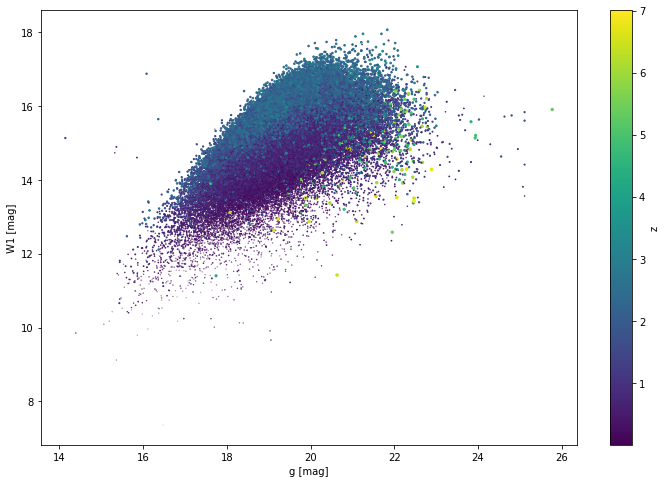

In [20]:
plt.scatter(d.gmag,d.W1mag,c=d.z,s=d.z)
plt.colorbar(label="z")
plt.xlabel("g [mag]")
plt.ylabel("W1 [mag]")

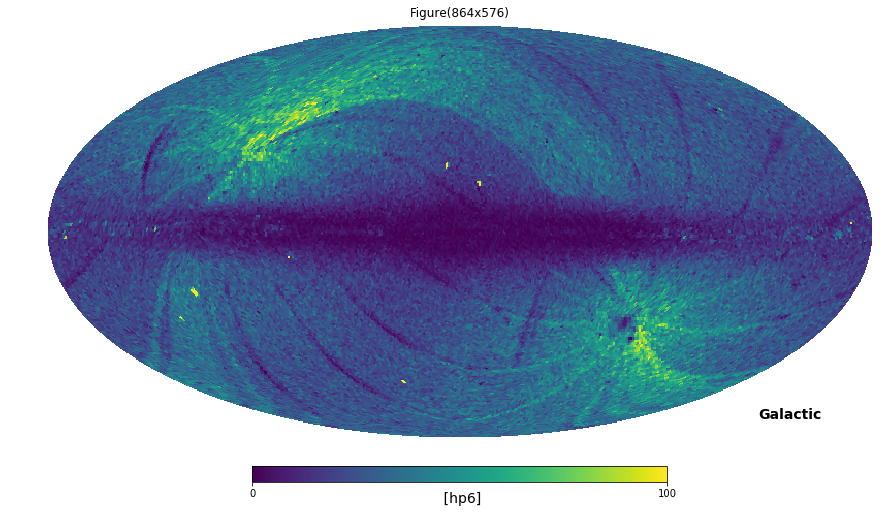

In [21]:
hp = hpExpr(6)
d['hp'] = hp.angle2pixel(d.RAJ2000,d.DEJ2000)
hp.setHpCount(d)
f = plt.figure()
hp.plot(f,vmin=0,vmax=100,cmap=mp.cm.viridis,coord='G')

//anaconda/lib/python3.5/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
//anaconda/lib/python3.5/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
//anaconda/lib/python3.5/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


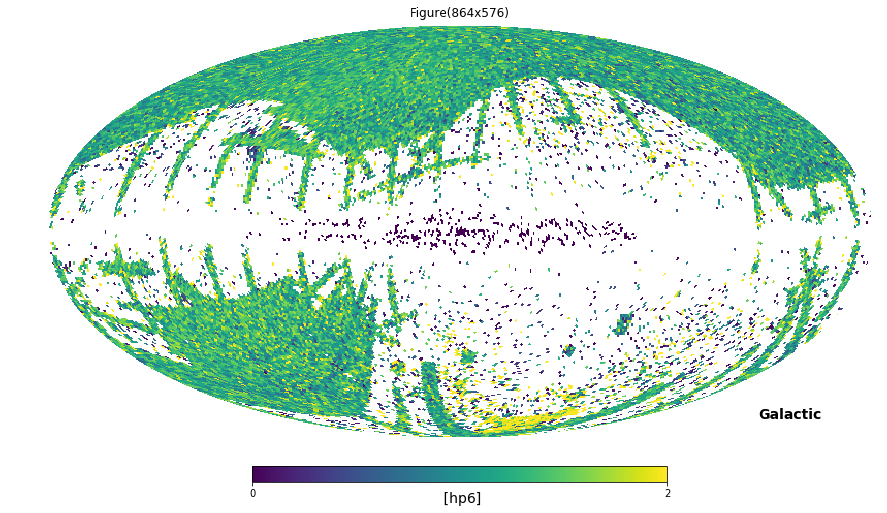

In [22]:
hp = hpExpr(6)
d['hp'] = hp.angle2pixel(d.RAJ2000,d.DEJ2000)
hp.setHpValues(d,keyValue='z')
f = plt.figure()
hp.plot(f,vmin=0,vmax=2,cmap=mp.cm.viridis,coord='G')

//anaconda/lib/python3.5/site-packages/healpy/pixelfunc.py:304: RuntimeWarning: invalid value encountered in less_equal
  return np.absolute(m - badval) <= atol + rtol * np.absolute(badval)
//anaconda/lib/python3.5/site-packages/numpy/ma/core.py:2344: RuntimeWarning: invalid value encountered in less_equal
  mabs(xnew - value), atol + rtol * mabs(value))
//anaconda/lib/python3.5/site-packages/healpy/projaxes.py:1053: RuntimeWarning: invalid value encountered in less
  result.data[result.data<0]=0.0
//anaconda/lib/python3.5/site-packages/healpy/projaxes.py:1054: RuntimeWarning: invalid value encountered in greater
  result.data[result.data>1]=1.0


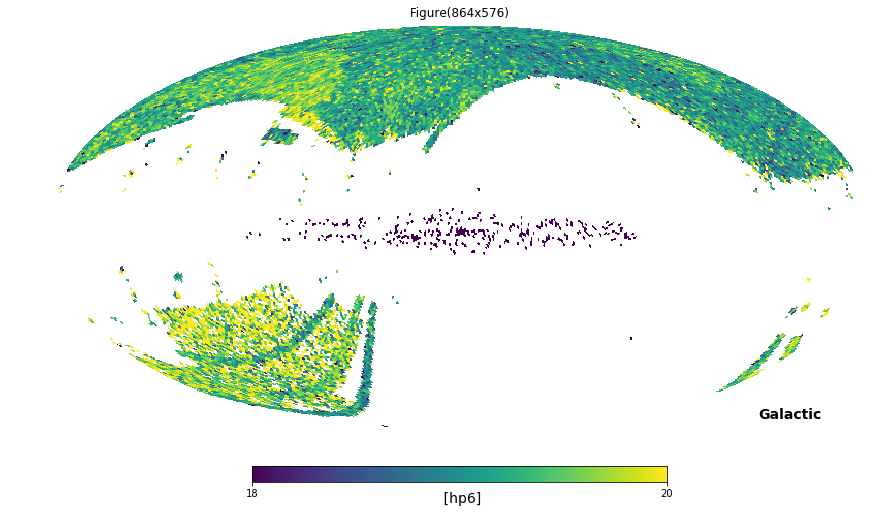

In [23]:
hp = hpExpr(6)
d['hp'] = hp.angle2pixel(d.RAJ2000,d.DEJ2000)
hp.setHpValues(d,keyValue='gmag')
f = plt.figure()
hp.plot(f,vmin=18,vmax=20,cmap=mp.cm.viridis,coord='G')

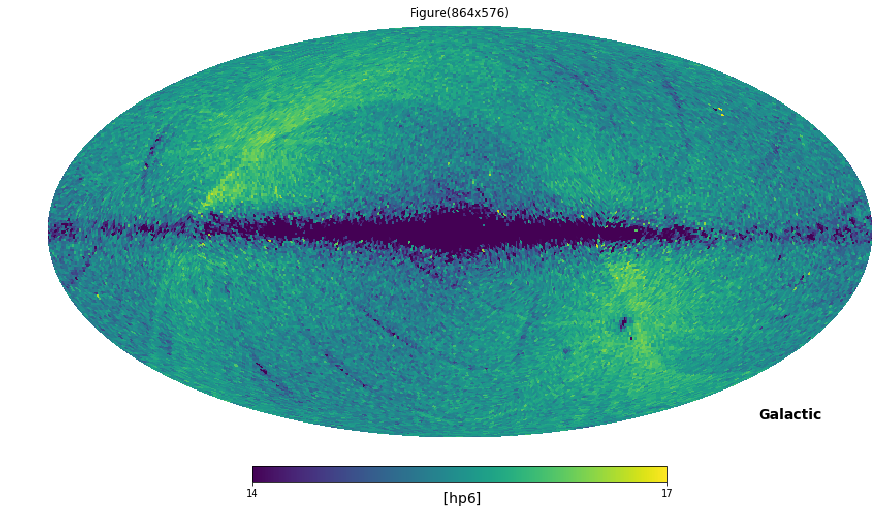

In [24]:
hp = hpExpr(6)
d['hp'] = hp.angle2pixel(d.RAJ2000,d.DEJ2000)
hp.setHpValues(d,keyValue='W1mag')
f = plt.figure()
hp.plot(f,vmin=14,vmax=17,cmap=mp.cm.viridis,coord='G')

In [25]:
columns = ['ra','ra_error','dec','dec_error','ra_dec_corr',
           'parallax','parallax_error',
           'pmra','pmra_error','pmdec','pmdec_error',
           'phot_g_mean_mag']

In [26]:
def DR1error(g): 
    if g <= 15 :
        return 0.05 
    return 0.05*np.exp(0.2*(g-15)*(g-15))

DR1error = np.vectorize(DR1error)

def pm_error_DR2(g): 
    if g <= 15 :
        return 0.06
    return 0.06*np.exp(0.6*(g-15))

pm_error_DR2 = np.vectorize(pm_error_DR2)

def parallax_error_DR2(g): 
    if g <= 15 :
        return 0.04
    return 0.04*np.exp(0.5*(g-15)+0.01*(g-15)*(g-15))

parallax_error_DR2 = np.vectorize(parallax_error_DR2)

In [27]:
def randomFromData(data,n,range=(-1,1),bins=1000) : 
    """generate n random points following data distribution"""
    hist, bins = np.histogram(data, bins=bins,range=range)
    bin_midpoints = bins[:-1] + np.diff(bins)/2
    cdf = np.cumsum(hist)
    cdf = cdf / cdf[-1]
    values = np.random.rand(n)
    value_bins = np.searchsorted(cdf, values)
    random_from_cdf = bin_midpoints[value_bins]
    return random_from_cdf

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


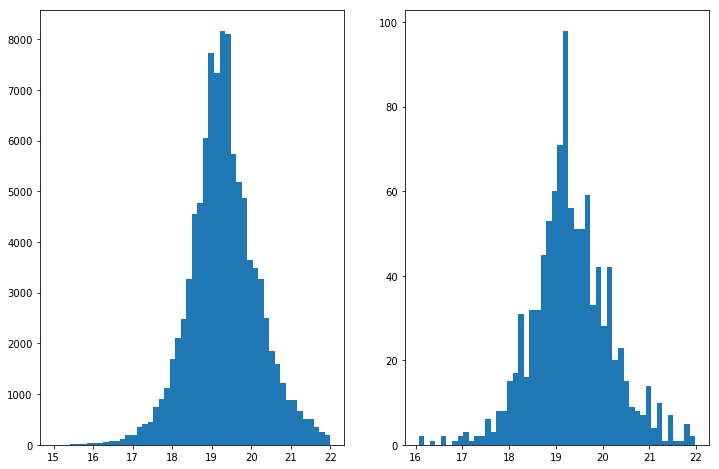

In [28]:
data = np.random.normal(size=1000)
plt.subplot(121)
plt.hist(d.gmag, 50,range=(15,22))
plt.subplot(122)
plt.hist(randomFromData(d.gmag,1000,range=(15,22)), bins=50)
plt.show()

# simulated GAIA Allwise

In [29]:
d['ra'] =  d['RAJ2000']
d['dec'] = d['DEJ2000']
d['phot_g_mean_mag'] = randomFromData(d.gmag,len(d),range=(15,22))
d['ra_error'] = DR1error(d.phot_g_mean_mag)
d['dec_error'] = d['ra_error']
d['pmra_error'] = pm_error_DR2(d.phot_g_mean_mag)
d['pmdec_error'] = d['pmra_error']
d['pmra'] = np.random.normal(scale=d.pmra_error,size=len(d))
d['pmdec'] = np.random.normal(scale=d.pmdec_error,size=len(d))
d['parallax_error'] = parallax_error_DR2(d.phot_g_mean_mag)
d['parallax'] = np.random.normal(scale=d.parallax_error,size=len(d))

//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
//anaconda/lib/python3.5/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


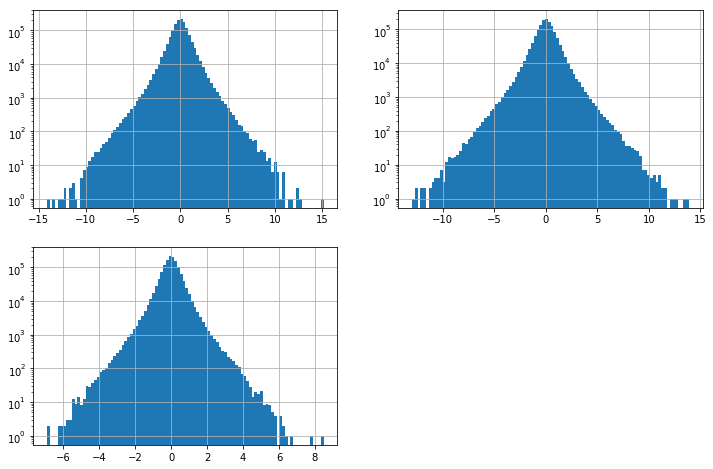

In [30]:
plt.subplot(221)
d.pmra.hist(bins=100)
plt.yscale('log')
plt.subplot(222)
d.pmdec.hist(bins=100)
plt.yscale('log')
plt.subplot(223)
d.parallax.hist(bins=100)
plt.yscale('log')

one should only take one 30% of it

In [31]:
dsim = d[d.index%3==0]

In [32]:
dsim.ra.count()

451592

In [34]:
dsim.to_csv("DR2simALLwiseQSO.csv")

In [35]:
dsim.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 451592 entries, 0 to 1354773
Columns: 27 entries, WISEA to parallax
dtypes: float32(4), float64(16), int64(1), object(6)
memory usage: 89.6+ MB


# check against known LENSED QSO

In [38]:
Lqso = pd.read_csv("Lqso.csv")

In [39]:
Lqso.columns

Index(['Unnamed: 0', '#', 'Image', 'name', 'G', 'zs', 'zl', 'Ra', 'Dec', 'Ext',
       'ms', 'ml', 'FGHz', 'Nim', 'dl', 'dt', 'sigma', 'ra_deg', 'dec_deg',
       'ra', 'dec'],
      dtype='object')

In [40]:
d.columns

Index(['WISEA', 'RAJ2000', 'DEJ2000', 'W1-W2', 'W2-W3', 'W1mag', 'gmag', 'z',
       'f_z', 'LQAC2', 'DR12Q', 'HMQ', 'Sloan', 'alpha', 'delta', 'hp', 'ra',
       'dec', 'phot_g_mean_mag', 'ra_error', 'dec_error', 'pmra_error',
       'pmdec_error', 'pmra', 'pmdec', 'parallax_error', 'parallax'],
      dtype='object')

In [41]:
Lqso.columns

Index(['Unnamed: 0', '#', 'Image', 'name', 'G', 'zs', 'zl', 'Ra', 'Dec', 'Ext',
       'ms', 'ml', 'FGHz', 'Nim', 'dl', 'dt', 'sigma', 'ra_deg', 'dec_deg',
       'ra', 'dec'],
      dtype='object')

In [42]:
hp = hpExpr(6)

In [43]:
Lqso['hp']=hp.angle2pixel(Lqso.ra*u.rad.to(u.deg),Lqso.dec*u.rad.to(u.deg))

In [44]:
Lqso[:5]

,Unnamed: 0,#,Image,name,G,zs,zl,Ra,Dec,Ext,...,FGHz,Nim,dl,dt,sigma,ra_deg,dec_deg,ra,dec,hp
0,0,1,NaN,Q0047-2808,A,3.60,0.48,00:49:41.89,-27:52:25.7,0.016,...,NaN,4ER,2.70,NaN,229±15,12.424542,-27.873806,0.216849,-0.486490,16644
1,1,2,NaN,HE0047-1756,A,1.66,0.41,00:50:27.83,-17:40:8.8,0.022,...,NaN,2,1.44,NaN,NaN,12.615958,-17.669111,0.220190,-0.308384,16836
2,2,3,NaN,HST01247+0352,C,NaN,NaN,01:24:44.4,+03:52:00,0.029,...,NaN,2,2.20,NaN,NaN,21.185000,3.866667,0.369748,0.067486,18212
3,3,4,NaN,HST01248+0351,C,NaN,NaN,01:24:45.6,+03:51:06,0.029,...,NaN,2,0.74,NaN,NaN,21.190000,3.851667,0.369835,0.067224,18212
4,4,5,NaN,B0128+437,B,3.124,NaN,01:31:13.405,+43:58:13.14,0.082,...,F5=48,4,0.55,NaN,NaN,22.805854,43.970317,0.398037,0.767427,2820
